# Diabetes Analysis with Pima Data

Diabetes is a medical disorder characterised by high blood sugar levels over a prolonged period (Wikipedia). According to a 2016 article by (Pulse Ghana)[http://www.pulse.com.gh/news/local/diabetes-in-ghana-about-4-million-ghanaians-are-living-with-diabetes-id5764114.html], about 4 million Ghanaians were living with the medical condition. Aside the living-changing implications of diabetes on the individual, it's symptoms have an effect on entire families, communities and the nation at large. If not treated effectively, diabetes can deplete the workforce and resources of a nation.

This makes the early detection and treatment of diabetes a key priority for countries through effective health screening services. 

## Import Libraries for Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this makes it possible to view the plots inline with the code
%matplotlib inline 


## Loading and Reviewing data

In [3]:
pima = pd.read_csv('./data/pima-data.csv')

In [4]:
print(pima.shape)

(768, 10)


In [5]:
pima.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
pima.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [7]:
pima.describe() # summary statistics for numerical variables

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [8]:
pima.groupby('diabetes').size() # frequency count of categorical target variable

diabetes
False    500
True     268
dtype: int64

### Checking for Null values

In [9]:
pima.isnull().values.any() #checks if there is any missing value
# the isnull() checks to see if there are any null values
# the any() method returns true if there is a null value in the whole data


False

## Summary Statistics


## Exploratory Data Analysis
This is done to visually spot outliers, errors, missing values, correlations and also derive insights from the data which may inform the new features you derive or engineer for model building

### Data Types and Graphs for Visualization
**Univariate Analysis** 
* Distribution of one numerical variable - histogram (with density plot overlaying)
* Distribution of one categorical variable - bar graph

**Multivariate Analysis**
* Correlation of numerical variables - correlogram/ correlation matrix
* Distribution of two categorical variables - stacked bar/dodged plot
* Distribution of two numerical variables - scatterplot
* Distribution of one categorical and one numerical variable - boxplot/ violin plot
* Distribution of two categorical and one numerical variable - small multiple/ trellis chart
* Distribution of two numerical and one categorical variable - scatterplot 

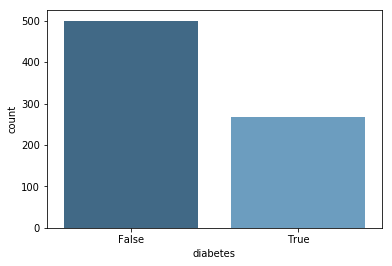

In [10]:
sns.countplot(x="diabetes", data=pima, palette="Blues_d")


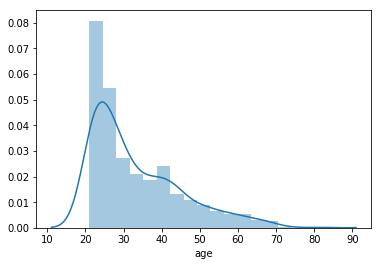

In [11]:
sns.distplot(pima.age) # age

## Correlation of Numerical Variables

In [12]:
pima.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [13]:
def plot_corr(pima, size=11):
    '''
        this is a function to produce a graph that shows the correlation betweeen
        the columns and use color representations to show which colums
        are more correlated thana others
    '''
    corr = pima.corr()
    fig,ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

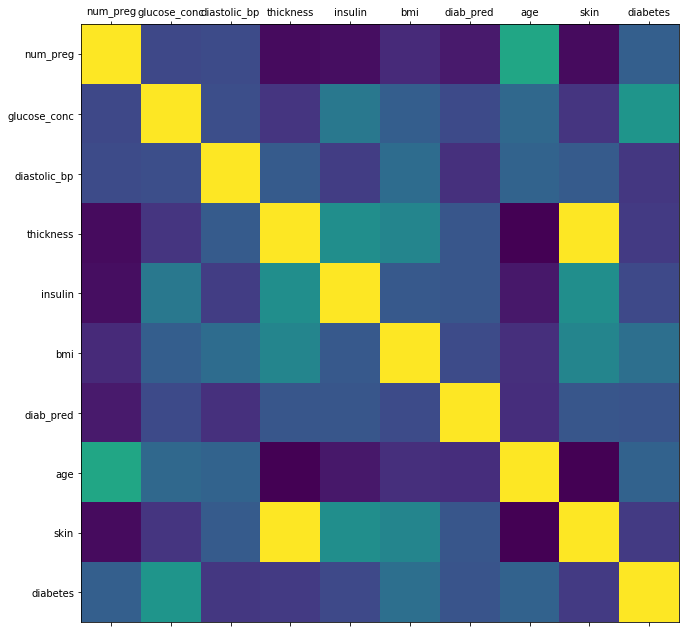

In [14]:
plot_corr(pima)

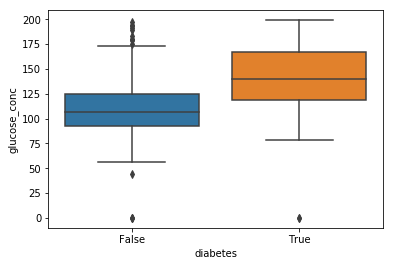

In [15]:
sns.boxplot(x="diabetes", y="glucose_conc", data=pima);

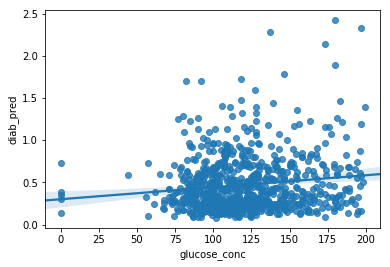

In [16]:
sns.regplot(x=pima['glucose_conc'], y=pima['diab_pred'])
#sns.plt.show()


# Model Building 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV

### Splitting the Data

In [18]:
diabetes_map = {True : 1, False : 0}

In [19]:
pima['diabetes'] = pima['diabetes'].map(diabetes_map)

In [20]:
X = pima[pima.columns[:-1]]
y = pima['diabetes']

x_train, x_val, y_train, y_val = train_test_split(X,y, shuffle=True, test_size=0.3)

In [21]:
y_train.head()

756    0
704    0
261    1
258    0
311    0
Name: diabetes, dtype: int64

### Building A Logistic Regression

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None)

In [24]:
pred = model.predict(x_val)
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [25]:
accuracy_score(pred, y_val)

0.7575757575757576

In [26]:
lr_model = LogisticRegressionCV()
lr_model.fit(x_train, y_train.ravel())
# lr_model.transform(x_train, y_train.ravel())

lr_predicted_values = lr_model.predict(x_val)

lr_accuracy = accuracy_score(y_val, lr_predicted_values)


In [27]:
lr_accuracy

0.7662337662337663

### Building a Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

tree_predicted_values = tree_model.predict(x_val)

tree_accuracy = accuracy_score(y_val, tree_predicted_values)

In [30]:
tree_accuracy

0.7186147186147186

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rd_model = RandomForestClassifier()
rd_model.fit(x_train, y_train)

preds = rd_model.predict(x_val)
accuracy_score(y_val, preds)

0.7662337662337663